<a href="https://colab.research.google.com/github/joangog/object-detection/blob/main/coco2017_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model comparison on COCO 2017 dataset (Analysis)
*   SSD300 VGG16
*   SSDlite320 MobileNetV3-Large
*   Faster R-CNN ResNet-50 FPN
*   Faster R-CNN MobileNetV3-Large FPN
*   Mask R-CNN ResNet-50 FPN
*   YOLOv5s
*   YOLOv5m
*   YOLOv5l
*   YOLOv3 (to do)
*   YOLOv3 Tiny (to do)

### Import packages

In [2]:
from google.colab import drive

import os

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Gather evaluation results

In [17]:
# Mount GDrive directory
drive.mount('/content/drive')
results_dir = '/content/drive/MyDrive/object-detection-outputs/COCO2017'
results_files = os.listdir(results_dir)
results_files = [file for file in results_files if '.csv' in file]
print(results_files)

results = pd.DataFrame(columns=['model', 'model_time', 'iou_type', 'metric', 'iou', 'area', 'max_dets', 'score'])
for file in results_files:
  file_path = os.path.join(results_dir,file)
  results = results.append(pd.read_csv(file_path))
results = results.reset_index().iloc[:,1:-1]  # Drop uneeded columns
results

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['ssd300_vgg16_coco17_results.csv', 'fasterrcnn_resnet50_fpn_coco17_results.csv', 'maskrcnn_resnet50_fpn_coco17_results.csv', 'yolov5s_coco17_results.csv', 'yolov5m_coco17_results.csv', 'yolov5l_coco17_results.csv']


,model,model_time,iou_type,metric,iou,area,max_dets,score
0,SSD300 VGG16,0.17055,bbox,avg_precision,0.50:0.95,all,100,0.251052
1,SSD300 VGG16,0.17055,bbox,avg_precision,0.50,all,100,0.415694
2,SSD300 VGG16,0.17055,bbox,avg_precision,0.75,all,100,0.262727
3,SSD300 VGG16,0.17055,bbox,avg_precision,0.50:0.95,small,100,0.055563
4,SSD300 VGG16,0.17055,bbox,avg_precision,0.50:0.95,medium,100,0.268253
...,...,...,...,...,...,...,...,...
79,YOLOv5l,0.18204,bbox,avg_recall,0.50:0.95,all,10,0.490071
80,YOLOv5l,0.18204,bbox,avg_recall,0.50:0.95,all,100,0.498907
81,YOLOv5l,0.18204,bbox,avg_recall,0.50:0.95,small,100,0.299156
82,YOLOv5l,0.18204,bbox,avg_recall,0.50:0.95,medium,100,0.549439


### Plot Time/mAP graph (max detections = 100)

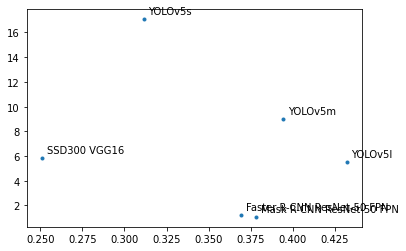

(array([ 5.86337946,  1.2108156 ,  1.07102878, 17.06562506,  8.96128808,
         5.4932917 ]),
 array([0.25105235, 0.36915638, 0.37821932, 0.31132038, 0.39450703,
        0.43206616]))

In [18]:
models = results.model.unique()

plot_data = results[
              (results['iou_type'] == 'bbox') &
              (results['metric'] == 'avg_precision') & 
              (results['iou'] == '0.50:0.95') &
              (results['area'] == 'all') &
              (results['max_dets'] == 100)
              ]

time = plot_data['model_time'].values
fps = 1.0 / time
mAP = plot_data['score'].values


plt.figure()
for i, model in enumerate(models):
    plt.annotate(model, (mAP[i], fps[i]), xytext=(5, 5), textcoords='offset points')
plt.plot(mAP,fps,'.')
plt.xlabel = 'MAP'
plt.ylabel = 'FPS'
plt.show()

fps, mAP